In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
data.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [8]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


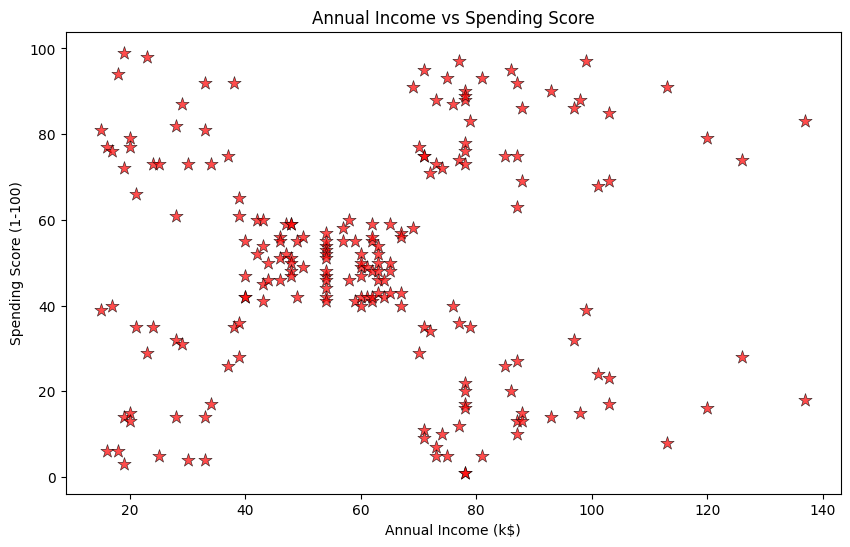

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data,color='red',edgecolor='black',alpha=0.7,linewidth=0.5,marker='*',s=100)
plt.title('Annual Income vs Spending Score')    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

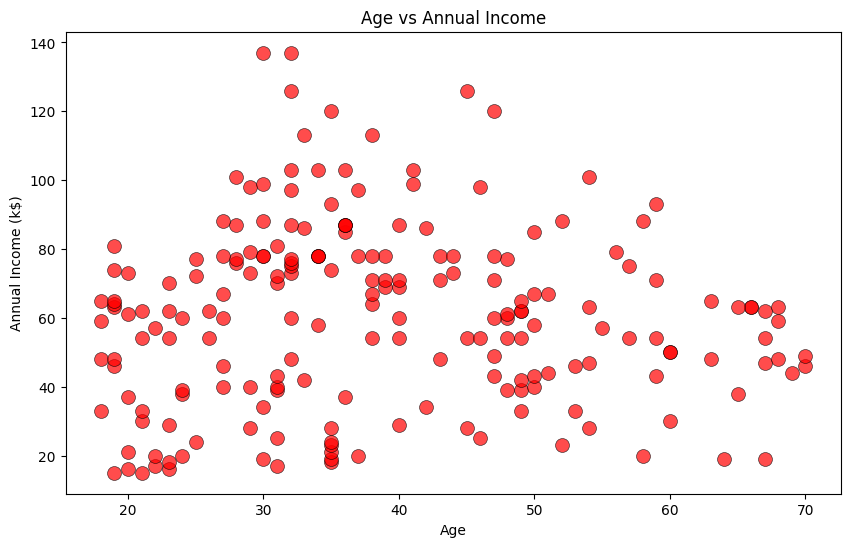

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data,color='red',edgecolor='black',alpha=0.7,linewidth=0.5,marker='o',s=100)
plt.title('Age vs Annual Income')    
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = data.columns
scaled_data = scaler.fit_transform(data)
scaled_data


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [5]:
#array into  dataframe
data = pd.DataFrame(scaled_data, columns=columns)
data


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [10]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5, random_state=42)
model.fit(data)
data['Cluster'] = model.labels_
model.labels_


array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [11]:
data['Cluster'].value_counts()

Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64

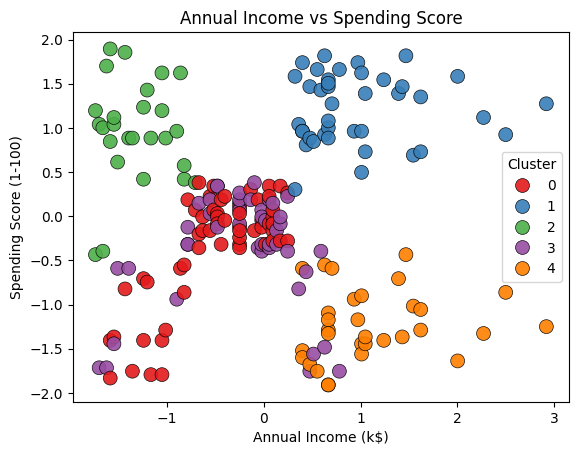

C:\Users\vishn\AppData\Local\Temp\ipykernel_27916\1095352643.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


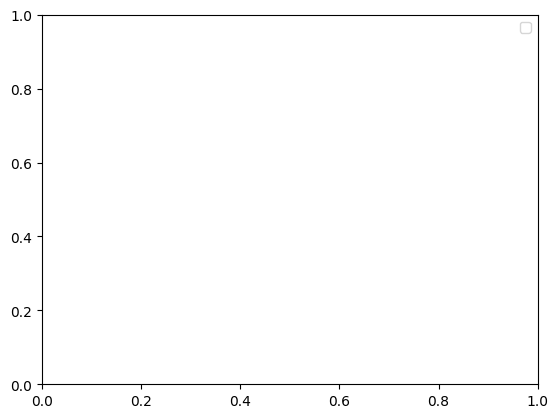

In [12]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1',alpha=0.9,edgecolor='black',linewidth=0.5,marker='o',s=100)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')
plt.show()
plt.legend()

In [24]:
# Supervised Learning with Regularized Random Forest to prevent overfitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Cluster', axis=1)
y = data['Cluster']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with regularization to reduce overfitting
clf = RandomForestClassifier(
    n_estimators=50,           # Reduced from 100
    max_depth=8,               # Limit tree depth
    min_samples_split=5,       # Minimum samples to split
    min_samples_leaf=2,        # Minimum samples in leaf
    max_features='sqrt',       # Use sqrt of features
    random_state=42
)

# Train model
clf.fit(X_train, y_train)

# Predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Accuracies
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {train_acc - test_acc:.4f}")

Training Accuracy: 0.9875
Testing Accuracy: 1.0000
Overfitting Gap: -0.0125


In [25]:
import joblib
joblib.dump(clf, 'kmeans_random_forest_model.pkl')

['kmeans_random_forest_model.pkl']